In [1]:
import cv2
import pandas as pd
import numpy as np
from tensorflow import keras
import glob
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

---
# 장르 데이터 읽기

In [2]:
land_path = '../Data/Artist/genre/resized/landscape/*.jpg'
land_file = [file for file in glob.glob(land_path)]
landCount = len(land_file)
landCount

378

In [3]:
port_path = '../Data/Artist/genre/resized/portrait/*.jpg'
port_file = [file for file in glob.glob(port_path)]
portCount = len(port_file)
portCount

496

In [4]:
port_file_slt = [port_file[id] for id in np.random.randint(0, portCount, size=400)]
portCount = len(port_file_slt)
portCount

400

In [5]:
height = 400
width = 600
colors = 3
numberOfimage = landCount + portCount

In [6]:
trainData = np.zeros(numberOfimage * height * width * colors).reshape(-1, height, width, colors)

In [7]:
targetData = np.concatenate([np.zeros(landCount), np.ones(portCount)])  # land : 0, port : 1
targetData

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
i = 0
for id in range(landCount):
    img = np.array(Image.open(land_file[id]), np.int32)
    trainData[i] = img
    i += 1

In [9]:
for id in range(portCount):
    img = np.array(Image.open(port_file[id]), np.int32)
    trainData[i] = img
    i += 1


---
# 학습, 검증, 테스트 데이터 분리

In [10]:
train = trainData / 255.0

In [11]:
trainData, testData, trainTarget, testTarget = train_test_split(
    train, targetData, test_size=0.2, random_state=42
)

trainData, valData, trainTarget, valTarget = train_test_split(
    trainData, trainTarget, test_size=0.2, random_state=42
)

In [12]:
print(trainData.shape)
print(trainTarget.shape)
print(valData.shape)
print(valTarget.shape)
print(testData.shape)
print(testTarget.shape)

(497, 400, 600, 3)
(497,)
(125, 400, 600, 3)
(125,)
(156, 400, 600, 3)
(156,)


---
# 딥러닝 모델 생성

In [13]:
model = keras.Sequential()

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-08-04 15:30:47.623339: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-04 15:30:47.623479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.add(
    keras.layers.Conv2D(
        64, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
        input_shape = (height, width, colors) 
    )
)

In [15]:
model.add(keras.layers.MaxPooling2D(2))

In [16]:
model.add(
    keras.layers.Conv2D(
        64, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
    )
)

In [17]:
model.add(keras.layers.MaxPooling2D(2))

In [18]:
model.add(
    keras.layers.Conv2D(
        128, 
        kernel_size = 3, 
        activation = 'relu',
        padding = 'same',
    )
)

In [19]:
model.add(keras.layers.MaxPooling2D(2))

In [20]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.6))  # 50% Drop Out
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.6))  # 50% Drop Out
model.add(keras.layers.Dense(2, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 600, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 300, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 300, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 150, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 150, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 75, 128)      0

In [22]:
# 모델 학습하기
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics ='accuracy'
)

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/Artist/model/land_port_v3.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    trainData, 
    trainTarget, 
    epochs=50, 
    validation_data=[valData, valTarget],
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/50


2022-08-04 15:30:48.823439: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-04 15:30:49.069902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - ETA: 0s - loss: 0.7884 - accuracy: 0.7887

2022-08-04 15:31:09.712084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 24s 1s/step - loss: 0.7884 - accuracy: 0.7887 - val_loss: 0.2600 - val_accuracy: 0.8960
Epoch 2/50
16/16 [==============================] - 22s 1s/step - loss: 0.2676 - accuracy: 0.9135 - val_loss: 0.2794 - val_accuracy: 0.9040
Epoch 3/50
16/16 [==============================] - 22s 1s/step - loss: 0.1805 - accuracy: 0.9396 - val_loss: 0.2201 - val_accuracy: 0.9040
Epoch 4/50
16/16 [==============================] - 22s 1s/step - loss: 0.1693 - accuracy: 0.9437 - val_loss: 0.3009 - val_accuracy: 0.9040
Epoch 5/50
16/16 [==============================] - 22s 1s/step - loss: 0.1473 - accuracy: 0.9477 - val_loss: 0.2126 - val_accuracy: 0.9040
Epoch 6/50
16/16 [==============================] - 22s 1s/step - loss: 0.1149 - accuracy: 0.9598 - val_loss: 0.2282 - val_accuracy: 0.9120
Epoch 7/50
16/16 [==============================] - 22s 1s/step - loss: 0.0782 - accuracy: 0.9698 - val_loss: 0.3212 - val_accuracy: 0.9280
Epoch 8/50
16/16 [=============

In [25]:
model.evaluate(testData, testTarget)

5/5 [==============================] - 2s 399ms/step - loss: 0.2473 - accuracy: 0.9359


[0.24728229641914368, 0.9358974695205688]

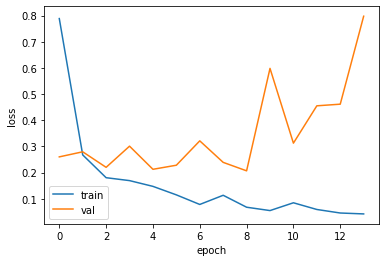

In [26]:
# 시각화 해보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()